In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
normalized_data = pd.read_csv('D:/DWDM Datasets/normalized_data_without_Class_Imbalancing.csv')

# Splitting the data into features (X) and target (y)
X = normalized_data.drop(columns=['Diagnosis'])
y = normalized_data['Diagnosis']

# Splitting the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 682.7 kB/s eta 0:00:03
   - -------------------------------------- 0.1/1.5 MB 825.8 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.5 MB 1.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.5 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.5 MB 2.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.5 MB 3.8 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.5 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Sakib\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
6325 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kf

Tuned LightGBM Model Performance:
Best Parameters: {'boosting_type': 'gbdt', 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 500, 'num_leaves': 100, 'subsample': 1.0}
Accuracy: 0.9882352941176471
F1 Score (Weighted): 0.9853160152486408
Precision (Weighted): 0.9842696447950878
Recall (Weighted): 0.9882352941176471
Cross-validation Accuracy (5-fold): 0.9880494472482576

Confusion Matrix (Tuned LightGBM):
[[ 172    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    1    0    0    0    0    0    0    0    1    0    0    2]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    5    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0  154    1    0    0    0

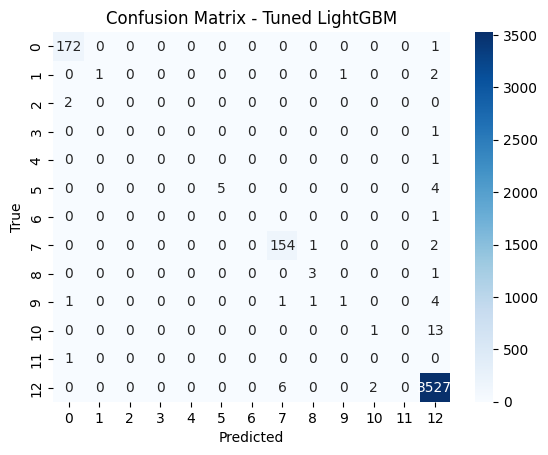

In [20]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# Step 1: Initialize the LightGBM model with GPU support
lgb_model = lgb.LGBMClassifier(
    random_state=42, 
    device='gpu',  # Use GPU for training
    gpu_platform_id=0,  # Platform ID of GPU (typically 0 for default GPU)
    gpu_device_id=0,  # Device ID of GPU (typically 0 for the default GPU)
)
 
# Step 2: Define the parameter grid for hyperparameter tuning
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_data_in_leaf': [20, 50],
    'boosting_type': ['gbdt', 'dart']
}
 
# Step 3: Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
 
# Step 4: Perform hyperparameter tuning (Grid Search)
grid_search.fit(X_train, y_train)
 
# Step 5: Get the best model after tuning
best_lgb_model = grid_search.best_estimator_
 
# Step 6: Train the best model on the training set
best_lgb_model.fit(X_train, y_train)
 
# Step 7: Make predictions on the test set
y_pred_lgb = best_lgb_model.predict(X_test)
 
# Step 8: Evaluate the model's performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
 
# Step 9: Cross-validation score (5-fold cross-validation)
cv_score_lgb = cross_val_score(best_lgb_model, X_train, y_train, cv=5, scoring='accuracy')
 
# Step 10: Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
 
# Step 11: Display results
print("Tuned LightGBM Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_lgb}")
print(f"F1 Score (Weighted): {f1_lgb}")
print(f"Precision (Weighted): {precision_lgb}")
print(f"Recall (Weighted): {recall_lgb}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lgb.mean()}")
 
# Step 12: Confusion Matrix for Tuned LightGBM model
print("\nConfusion Matrix (Tuned LightGBM):")
print(conf_matrix_lgb)
 
# Step 13: Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Tuned LightGBM')
plt.show()

C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Sakib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


LightGBM Model Performance:
Accuracy: 0.9378516624040921
F1 Score (Weighted): 0.9206666997443559
Precision (Weighted): 0.9184530711636375
Recall (Weighted): 0.9378516624040921
Cross-validation Accuracy (5-fold): 0.909661679884643

Confusion Matrix (LightGBM):
[[ 121    0    0    0    0    0    0    4    0    0    0    0   48]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   5    0    0    0    0    0    0   24    0    0    0    1  127]
 [   0    0    0    0    0    0    0    2    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    8]
 [   0    0    0    0    0    0    0    1    0    0    0    

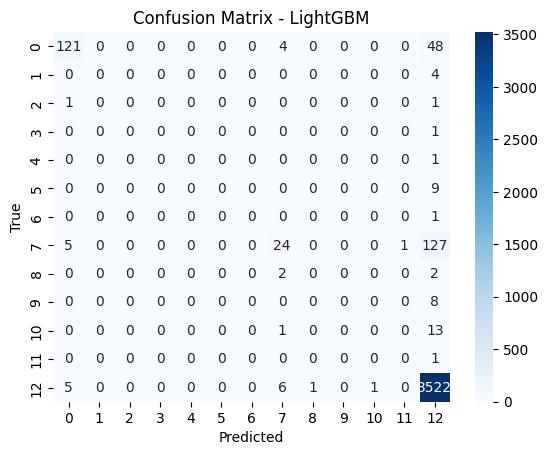

In [25]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
 
# Step 1: Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
 
# Step 2: Train the model on the training set
lgb_model.fit(X_train, y_train)
 
# Step 3: Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)
 
# Step 4: Evaluate the model's performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')
 
# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
 
# Step 6: Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
 
# Step 7: Display results
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgb:}")
print(f"F1 Score (Weighted): {f1_lgb:}")
print(f"Precision (Weighted): {precision_lgb:}")
print(f"Recall (Weighted): {recall_lgb:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lgb.mean():}")
 
# Step 8: Confusion Matrix for LightGBM model
print("\nConfusion Matrix (LightGBM):")
print(conf_matrix_lgb)
 
# Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LightGBM')
plt.show()
